In [1]:
# standard libraries
import math, os, time, sys
import numpy as np

import scipy

# plotting
import matplotlib.pyplot as plt

from Main import Canonical
from Main import Legendre

In [2]:
Sol = Legendre.Legendre_solution(10,0.1)

In [3]:
print(Sol.coeffs)
print(np.linalg.solve(Sol.A,Sol.b))

[ 4.00039561e-01  2.59974975e-01 -2.59968944e-01 -1.96098208e-01
 -1.14966143e-01 -5.52255203e-02 -2.24646131e-02 -7.87348075e-03
 -2.45021612e-03 -7.71909878e-04 -1.89645211e-04]
[ 4.00039561e-01  2.59974975e-01 -2.59968944e-01 -1.96098208e-01
 -1.14966143e-01 -5.52255203e-02 -2.24646131e-02 -7.87348075e-03
 -2.45021612e-03 -7.71909878e-04 -1.89645211e-04]


In [4]:
print(Sol.Loss,Sol.cond())

1.4639115436077806e-06 29991.588982868707


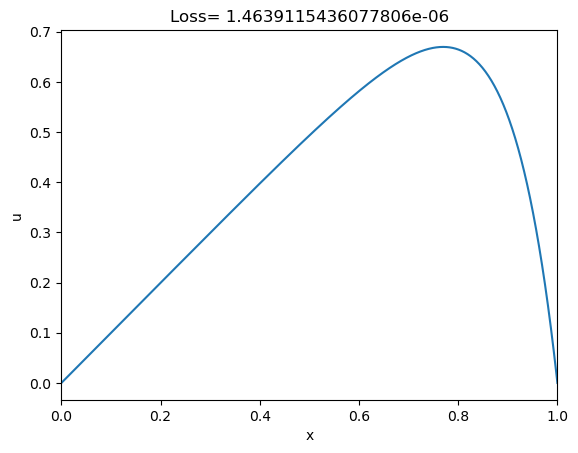

In [5]:
Sol.show_approx()